In [5]:
from selenium import webdriver
driver = webdriver.Chrome('C:/Users/gram/Downloads/chromedriver_win32/chromedriver.exe')

In [6]:
url = 'https://www.naver.com'
driver.get(url)

In [7]:
html = driver.page_source

<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36"><head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/ed
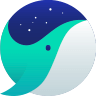
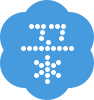

In [8]:
print(html)

In [10]:
# HTML 예시
html = '''
<html>
    <head>
    </head>
    <body>
        <h1>우리동네시장</h1>
        <div class='sale'>
            <p id='fruits1' class='fruits'>
                <span class='name'> 바나나 </span>
                <span class='price'> 3000원 </span>
                <span class='inventory'> 500개 </span>
                <span class='store'> 가나다상회 </span>
                <a href='http://homepage.com'> 홈페이지 </a>
            </p>
        </div>
        <div class='prepare'>
            <p id='fruits2' class='fruits'>
                <span class='name'> 파인애플 </span>
            </p>
        </div>
    </body>
</html>
'''

In [11]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, 'html.parser')

In [15]:
tags_span = soup.select('span')
tags_p = soup.select('p')

print(tags_span)
print(tags_p)

[<span class="name"> 바나나 </span>, <span class="price"> 3000원 </span>, <span class="inventory"> 500개 </span>, <span class="store"> 가나다상회 </span>, <span class="name"> 파인애플 </span>]
[<p class="fruits" id="fruits1">
<span class="name"> 바나나 </span>
<span class="price"> 3000원 </span>
<span class="inventory"> 500개 </span>
<span class="store"> 가나다상회 </span>
<a href="http://homepage.com"> 홈페이지 </a>
</p>, <p class="fruits" id="fruits2">
<span class="name"> 파인애플 </span>
</p>]


In [16]:
# id값으로 불러오기
ids_fruits1 = soup.select('#fruits1')

# class값으로 불러오기
class_price = soup.select('.price')

tags_span_class_price = soup.select('span.price')

print(ids_fruits1)
print(class_price)
print(tags_span_class_price)

[<p class="fruits" id="fruits1">
<span class="name"> 바나나 </span>
<span class="price"> 3000원 </span>
<span class="inventory"> 500개 </span>
<span class="store"> 가나다상회 </span>
<a href="http://homepage.com"> 홈페이지 </a>
</p>]
[<span class="price"> 3000원 </span>]
[<span class="price"> 3000원 </span>]


In [19]:
import re

price = re.sub('<.+?>', "", str(class_price), 0).strip()
print(price)

[ 3000원 ]


In [22]:
tags_name = soup.select('span.name')
print(tags_name)

[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]


In [23]:
tags_banana1 = soup.select('#fruits1 > span.name')
print(tags_banana1)

[<span class="name"> 바나나 </span>]


In [24]:
tags_banana2 = soup.select('div.sale > #fruits1 > span.name')
print(tags_banana2)

[<span class="name"> 바나나 </span>]


In [26]:
tags_banana3 = soup.select('div.sale span.name')
print(tags_banana3)

[<span class="name"> 바나나 </span>]


In [27]:
tags = soup.select('span.name')
tag_1 = tags[0]
print(tag_1)

<span class="name"> 바나나 </span>


In [28]:
tags = soup.select('a')
tag = tags[0]
content = tag.text
print(content)
link = tag['href']
print(link)

 홈페이지 
http://homepage.com
